<a href="https://colab.research.google.com/github/StanStarishko/python-programming-for-data/blob/main/Worksheets/10_2_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

In the previous worksheet you converted an SQL relational database to a single pandas dataframe and downloaded it. You will be analysing it today.

If you were unable to download the file, there is a copy located here:

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



### Inspect the dataset
---

In [ ]:
# Creating a block of necessary procedures and functions
# that we may need to perform reading and analysis of data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np


class DataStudio:

  ########################################################################
  # Block reading data from different sources
  ########################################################################
  class Reader:

    @staticmethod
    def is_valid_link(link="",link_name="",autotest=False):
      # link always isn't empty and must have is string
      return_value = link != "" and isinstance(link, str)

      if not return_value and not autotest: # not print if autotest
        print(f"{link_name} is not valid")

      return return_value


    # *********************************************
    @staticmethod
    def is_valid_df(df=None,name_df="",autotest=False):
      # check that "df" is Data Frame type
      if name_df == "" or not isinstance(name_df, str):
        name_df = "Yuor Data Frame"

      if not isinstance(df, pd.DataFrame) and not autotest: # not print if autotest
        print(f"{name_df} is not valid")
        return False

      return True


    # *********************************************
    # get data from Excel
    # *********************************************
    @staticmethod
    def get_excel_data(url="",sheet_name="default"):
      # url and sheet name always isn't empty and must have is string

      is_not_valid_url = not DataStudio.Reader.is_valid_link(url,"url")
      is_not_valid_sheet_name = not DataStudio.Reader.is_valid_link(sheet_name,"sheet name")

      if is_not_valid_url or is_not_valid_sheet_name:
        return False

      if sheet_name == "default":
        df = pd.read_excel(url)
      else:
        df = pd.read_excel(url,sheet_name)

      return df


    # *********************************************
    # get data from CVS
    # *********************************************
    @staticmethod
    def get_csv_data(url):

      if not DataStudio.Reader.is_valid_link(url,"url"):
        return False

      df = pd.read_csv(url)
      return df


  ########################################################################
  # Data Analysis, Preparation and Cleaning Block
  ########################################################################
  class Inspect:

    # *********************************************
    # Primary research
    # *********************************************
    @staticmethod
    def primary_research(df):
      if not DataStudio.Reader.is_valid_df(df,"df"):
        return False

      display(df.head())
      df.info()
      print("\nNull Values Summary:")
      print(df.isnull().sum())

      return True


    # *********************************************
    # Clean the data and/or repair Dataset
    # *********************************************
    @staticmethod
    def clean_data(df, threshold=50, only_cleaned=True, set_fillna=[]):
        if not DataStudio.Reader.is_valid_df(df, "df"):
            return False

        df_cleaned = df.copy()

        # If set_fillna is provided, replace NaNs based on column types
        if isinstance(set_fillna, dict):
          for fillna_params in set_fillna:
            bool_fill_value = set_fillna.get(fillna_params)
            df_cleaned[df_cleaned.select_dtypes(include=[fillna_params]).columns] = df_cleaned.select_dtypes(include=[fillna_params]).fillna(bool_fill_value)

        # Calculate the percentage of null values in each column
        null_percentage = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100

        # Drop columns with significant number of null values
        columns_to_drop = null_percentage[null_percentage > threshold].index
        df_cleaned_new = df_cleaned.drop(columns=columns_to_drop)

        if only_cleaned:
            return df_cleaned_new, 0  # Return only the cleaned DataFrame for save memory
        else:  # Return the cleaned DataFrame and the null percentage
            return df_cleaned_new, null_percentage


    # *********************************************
    # Remove outliers from the given column in the DataFrame.
    # *********************************************
    @staticmethod
    def remove_outliers(df, column):
        # Check if the column exists in the DataFrame
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            return False

        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Calculate upper and lower limits for outliers
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR

        # Filter out rows where the column values are within the limits
        df_normal = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

        return df_normal


  ########################################################################
  # Visualization block of analysis and statistics
  ########################################################################
  class Visualization:

    @staticmethod
    def creating_boxplot(df,box_name=""):

      # Check if the params is valid
      if not DataStudio.Reader.is_valid_df(df,"df") or not DataStudio.Reader.is_valid_link(box_name,"Box Name"):
        return False

      # Check if the data has been loaded and the required columns exist
      if not box_name in df.columns:
          print("Columns not found in the dataset!")
          return False

      # Create boxplot for Wellbeing
      plt.figure(figsize=(8, 6))
      sns.boxplot(data=df[box_name], color='skyblue')
      plt.title(f"Boxplot of {box_name}")
      plt.ylabel(f"{box_name}")
      plt.show()  # To separate the graphs
      print()

      return True


    # *********************************************
    # Line Plot with Average
    # *********************************************
    @staticmethod
    def line_plot(df, x_column="", y_column="",with_average=False):
      if not DataStudio.Reader.is_valid_df(df,"df") or not DataStudio.Reader.is_valid_link(x_column,"X Column") or not DataStudio.Reader.is_valid_link(y_column,"Y Column"):
        return False

      # Calculate average with a window size of 3
      name_title = f"{y_column} Line Plot"
      if with_average:
        name_average = f"{y_column}_avrg"
        df[name_average] = df[y_column].rolling(window=3).mean()
        name_title += " with Moving Average"


      plt.figure(figsize=(10, 6))
      sns.lineplot(x=x_column, y=y_column, data=df, marker='o', label=y_column, color='blue')
      if with_average:
        sns.lineplot(x=x_column, y=name_average, data=df, label=f'{y_column} Average', color='red', linestyle='--')

      plt.xlabel(x_column, fontsize=12)
      plt.ylabel(y_column, fontsize=12)
      plt.title(name_title, fontsize=14)
      plt.legend()
      plt.grid(True)

      plt.show()
      print()

      return True


    # *********************************************
    # plotting as a vertical bar chart
    # *********************************************
    @staticmethod
    def vertical_bar_chart(df_in, x_column="", y_column="",x_name="",y_name=""):

      if not DataStudio.Reader.is_valid_df(df_in,"df") or not DataStudio.Reader.is_valid_link(x_column,"X Column") or not DataStudio.Reader.is_valid_link(y_column,"Y Column"):
        return False

      plt.figure(figsize=(12, 8))
      sns.barplot(x=x_column, y=y_column, data=df_in, errorbar=None, estimator=np.mean)
      plt.title(f'Average {y_name} by {x_name}')
      plt.xlabel(x_name)
      plt.ylabel(f'Average {y_name}')
      plt.xticks(rotation=45)
      plt.show()
      print()

      return True


    # *********************************************
    # Histogram plot distribution with KDE Line
    # *********************************************
    @staticmethod
    def plot_distribution(df, column):
        if not DataStudio.Reader.is_valid_df(df, "df") or not DataStudio.Reader.is_valid_link(column, "column"):
            return

        plt.figure(figsize=(12, 8))
        sns.histplot(df[column], kde=True, bins=30)  # Use histplot with kde for a smooth distribution curve
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        print()

        return True


    # *********************************************
    # Compare mean and median
    # *********************************************
    @staticmethod
    def print_mean_median(df, column):
        if not DataStudio.Reader.is_valid_df(df, "df") or not DataStudio.Reader.is_valid_link(column, "column"):
            return

        mean_value = df[column].mean()
        median_value = df[column].median()

        print(f"Mean of {column}: {mean_value}")
        print(f"Median of {column}: {median_value}")
        print(f"Mean and Median are {'similar' if abs(mean_value - median_value) < 1e-5 else 'not similar'}\n")

        return True


    # *********************************************
    # Calculate the correlation matrix
    # *********************************************
    @staticmethod
    def create_correlation_heatmap(df):
        if not DataStudio.Reader.is_valid_df(df, "df"):
            return


        # Filter to keep only numeric columns
        df_numeric = df.select_dtypes(include=['number'])

        if df_numeric.empty:
            print("No numeric columns found in the DataFrame.")
            return False

        # Calculate correlation matrix
        correlation_matrix = df_numeric.corr().round(2)

        # Create a heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Heatmap')
        plt.show()
        print()

        return correlation_matrix


    # *********************************************
    # linear regression
    # *********************************************
    @staticmethod
    def linear_regression(df,name_x="",name_y="",not_display=False):

      if not DataStudio.Reader.is_valid_df(df) or not DataStudio.Reader.is_valid_link(name_x,"Data X") or not DataStudio.Reader.is_valid_link(name_y,"Data Y"):
        return False

      # Extract the 'Age' and 'Income' columns
      data_x = df[name_x]
      data_y = df[name_y]

      # Run the linear regression
      regression = linregress(data_x, data_y)
      if not_display:
        return regression

      # Display the regression result
      print(regression)

      # Display the slope, intercept, and rvalue
      print(f"Slope: {regression.slope}")
      print(f"Intercept: {regression.intercept}")
      print(f"R-value (Correlation Coefficient): {regression.rvalue}")
      print(f"P-value: {regression.pvalue}")
      print(f"Standard Error: {regression.stderr}")
      print(f"Y-intercept: {regression.intercept}")
      print(f"R-squared: {regression.rvalue ** 2}")
      print()

      return regression


    # *********************************************
    # Scatter Plot with Line of Best Fit
    # *********************************************
    @staticmethod
    def plot_line_of_best_fit(df,name_x="",name_y=""):
      if not DataStudio.Reader.is_valid_df(df) or not DataStudio.Reader.is_valid_link(name_x,"Data X") or not DataStudio.Reader.is_valid_link(name_y,"Data Y"):
        return False

      plt.figure(figsize=(10, 6))
      sns.regplot(x=name_x,
                  y=name_y,
                  data=df,
                  scatter_kws={'color': 'purple'},
                  line_kws={'color': 'olive', 'linewidth': 1}
                  )
      plt.xlabel(name_x)
      plt.ylabel(name_y)
      plt.title(f'Scatter Plot with Line of Best Fit for {name_x}')
      plt.show()
      print()

      return True


    # *********************************************
    # Creating Boxplot
    # *********************************************
    @staticmethod
    def creating_boxplot(df,box_name=""):

      # Check if the params is valid
      if not DataStudio.Reader.is_valid_df(df,"df") or not DataStudio.Reader.is_valid_link(box_name,"Box Name"):
        return False

      # Check if the data has been loaded and the required columns exist
      if not box_name in df.columns:
          print("Columns not found in the dataset!")
          return False

      # Create boxplot for Wellbeing
      plt.figure(figsize=(8, 6))
      sns.boxplot(data=df[box_name], color='skyblue')
      plt.title(f"Boxplot of {box_name}")
      plt.ylabel(f"{box_name}")
      plt.show()  # To separate the graphs
      print()

      return True


    # *********************************************
    #Creating a pie chart
    # *********************************************
    @staticmethod
    def show_piechart(df,name_group_col="",name_data_col="",kind_group="mean"):

      if not DataStudio.Reader.is_valid_df(df,"df") or not DataStudio.Reader.is_valid_link(name_group_col,"Group Column") or not DataStudio.Reader.is_valid_link(name_data_col,"Data Column"):
        return False

      # Grouping dataset
      if kind_group == "sum":
        group_data = df.groupby(name_group_col)[name_data_col].sum()
      elif kind_group == "min":
        group_data = df.groupby(name_group_col)[name_data_col].min()
      elif kind_group == "max":
        group_data = df.groupby(name_group_col)[name_data_col].max()
      else: # default mode
        group_data = df.groupby(name_group_col)[name_data_col].mean()

      # Create labela
      labels = group_data.index

      # Set the colour palette
      colors = sns.color_palette('muted')

      # Creating a pie chart
      plt.figure(figsize=(12, 8))
      plt.pie(group_data,
              labels=labels,
              labeldistance=1.1,
              pctdistance=0.97,
              colors=colors,
              autopct='%1.1f%%',
              startangle=140
              )
      plt.title(f'{name_data_col} Levels by {name_group_col}')
      plt.show()
      print()

      return True



#### Exploring dataset
---

In [ ]:
# defining Data Processing Methods
dsr = DataStudio.Reader
dsi = DataStudio.Inspect
dsv = DataStudio.Visualization

# defining main dataset
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
df = dsr.get_csv_data(url)
dsi.primary_research(df)

,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB

Null Values Summary:
Unnamed: 0         0
first_name         0
last_name          0
name               0
year               0
rank          255518
genre              0
dtype: int64


True

### Clean the dataset
---


In [ ]:
# Defining set for replace None values
#set_fillna = {}
set_fillna = dict([
    ('bool', False),
    ('object', 'Empty'),
    ('number', 0)
    ])

# Cleaning the data, replace None values
# and after removing columns with more than 50% missing values
df_cleaned, null_percentage = dsi.clean_data(df, threshold=50, only_cleaned=False, set_fillna=set_fillna)

# Printing the percentage of missing values in each column
print(f"\nNull Values Summary:\n{null_percentage}")
print()

# Displaying the cleaned DataFrame
dsi.primary_research(df_cleaned)


Null Values Summary:
Unnamed: 0    0.0
first_name    0.0
last_name     0.0
name          0.0
year          0.0
rank          0.0
genre         0.0
dtype: float64



,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,0.0,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,0.0,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,0.0,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,0.0,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,0.0,Short


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        368894 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB

Null Values Summary:
Unnamed: 0    0
first_name    0
last_name     0
name          0
year          0
rank          0
genre         0
dtype: int64


True

### How many movies of each genre are there?
---

             count
genre             
Short        72894
Drama        72635
Comedy       54667
Documentary  35698
Animation    17038
Romance      13562
Action       12890
Crime        12610
Family       11074
Thriller     10681
Adventure     8598
Western       8231
Horror        7423
Musical       6843
Sci-Fi        4957
Mystery       4951
Fantasy       4871
Music         4444
War           4398
Film-Noir      429



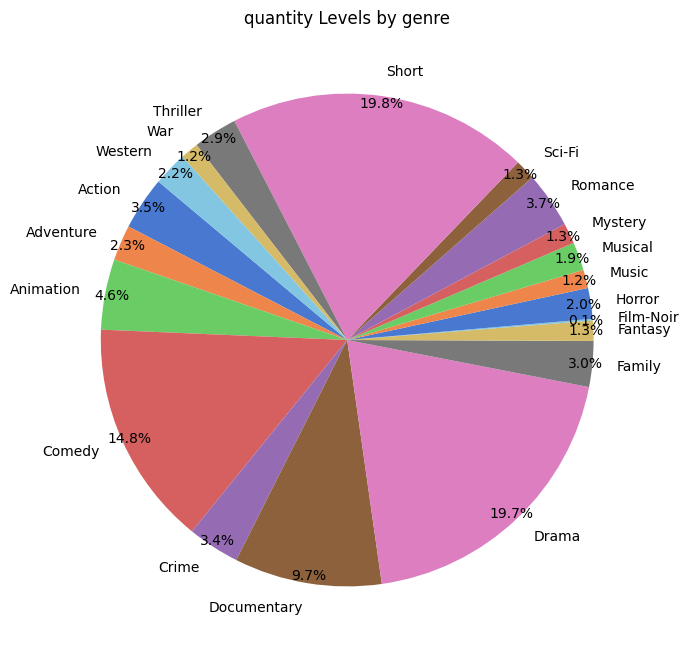

In [ ]:
# Counting the number of movies in each genre
genre_counts = pd.DataFrame(df_cleaned['genre'].value_counts())
print(genre_counts)
print()

df_cleaned['quantity'] = 1

# Creating a pie chart
result = dsv.show_piechart(df_cleaned,"genre","quantity","sum")


### Which director has the highest ranked movies?
---

In [ ]:
# Creating Directors
df_cleaned['director'] = df_cleaned['first_name'] + ' ' + df_cleaned['last_name']
directors = df_cleaned['director'].unique()
print(f"Total directors is {len(directors)}")

# Finding the director with the highest average movie ratings
top_director = df_cleaned.groupby('director')['rank'].mean().idxmax()
top_director_rank = df_cleaned.groupby('director')['rank'].mean().max()

print(f"Director with the highest-ranked movies: {top_director} with a rating of {top_director_rank}")



Total directors is 64269
Director with the highest-ranked movies: Debs Tarrier with a rating of 9.9


### How many movies have ranks of over 9?
---


In [ ]:
# Counting how many movies have a rating over 9
high_rank_movies = df_cleaned[df_cleaned['rank'] > 9]
print(f"Number of movies with a rating over 9: {len(high_rank_movies)}")


Number of movies with a rating over 9: 1483


### Plot a bar chart of mean rank and genre
---

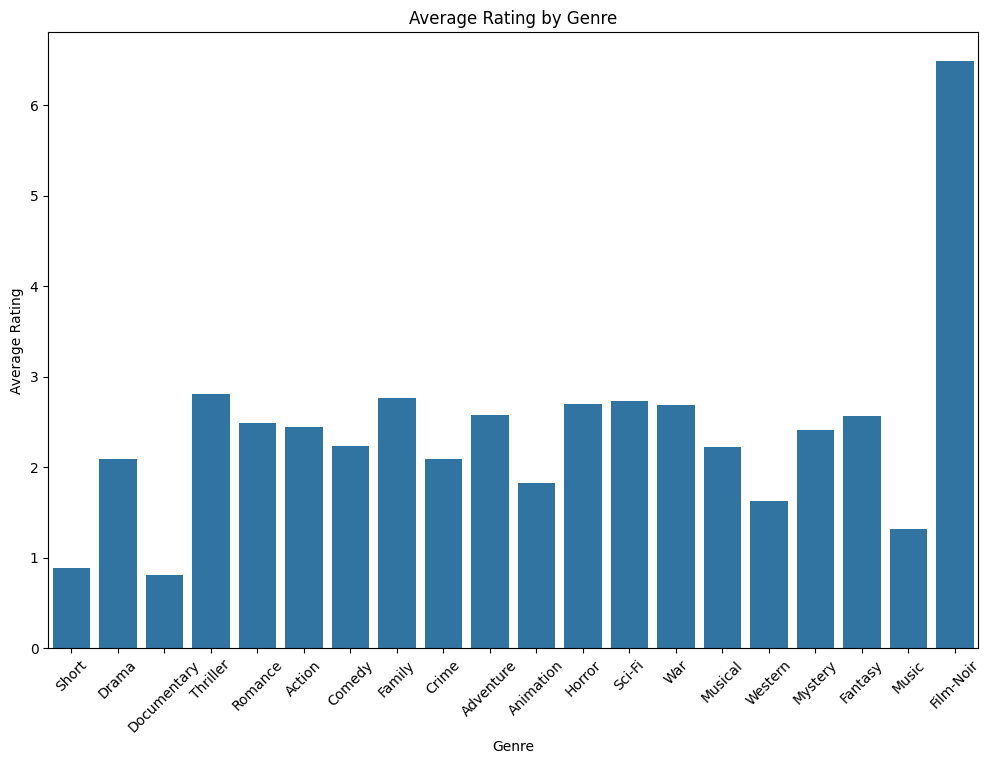

True

In [ ]:
# Creating a bar chart showing the average rating by genre
#vertical_bar_chart(df_cleaned.groupby('genre')['rank'].mean(), 'genre', 'rank')
dsv.vertical_bar_chart(df_cleaned, 'genre', 'rank','Genre','Rating')


### Plot a pie chart of how many movies of each genre there are
---


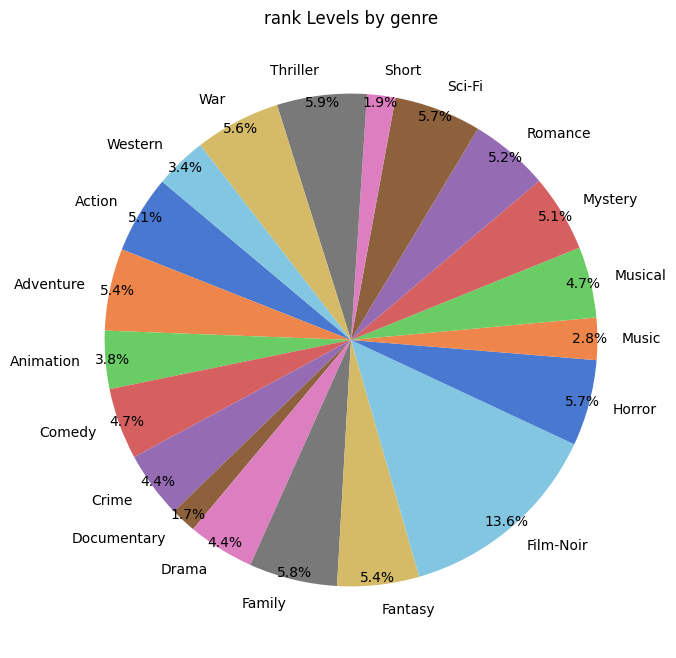

True

In [ ]:
# Creating a pie chart to show the number of movies in each genre
dsv.show_piechart(df_cleaned, name_group_col="genre", name_data_col="rank", kind_group="count")


### Plot a graph showing the mean Rank for each year

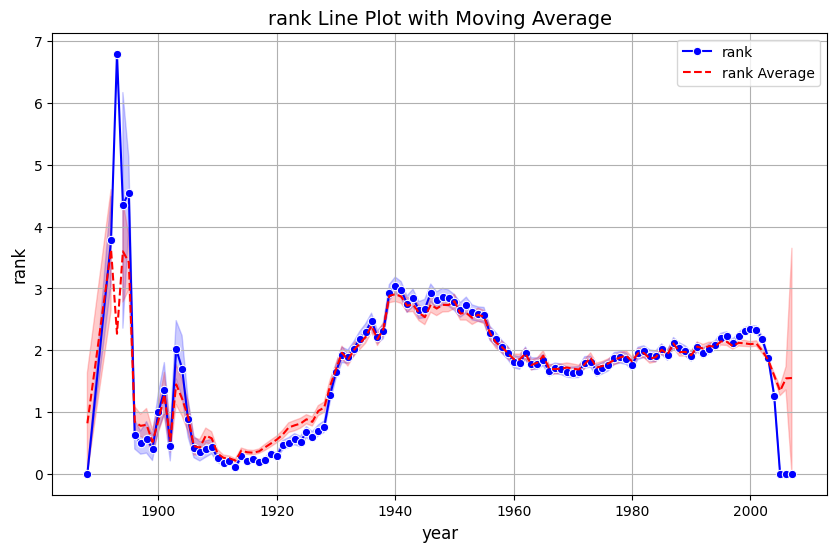

True

In [ ]:
# Plotting a graph of average movie ratings by year
dsv.line_plot(df_cleaned, x_column='year', y_column='rank', with_average=True)


### What else can you find out from this dataset?

Make a plan of 3 further things you can do to interrogate and analyse this dataset


---
#### **Outline:**
1. **Scatter Plot with Line of Best Fit** for the number of movies made by each director.
2. **Correlation Matrix** for the numeric columns in the dataset and display it using a heat map.
3. **Linear Regression** on the best fit axes and analyze the results.

---


#### Implementation

##### **1. Scatter Plot with Line of Best Fit** for the number of movies made by each director and their average ratings.

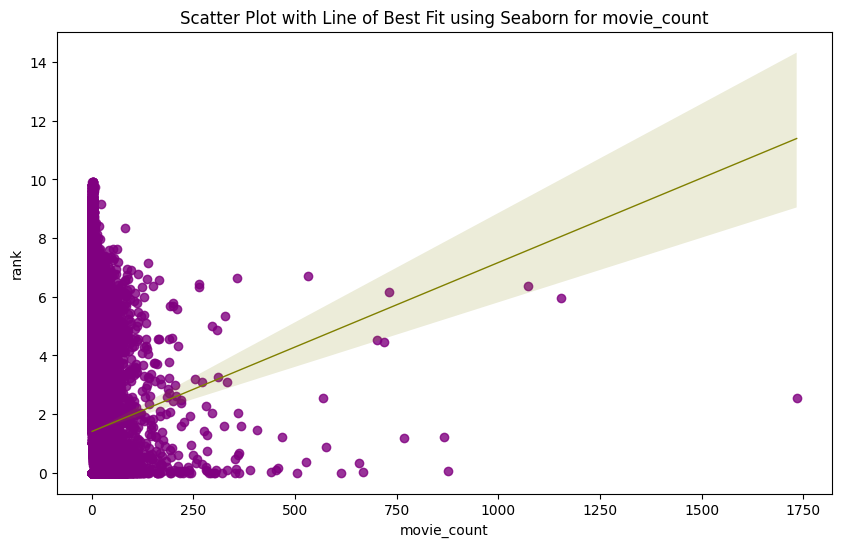

In [ ]:
# Counting the number of films per director
director_movie_counts = df_cleaned.groupby('director')['quantity'].sum().reset_index()
director_movie_counts.columns = ['director', 'movie_count']

# Combining data with estimates
director_avg_rank = df_cleaned.groupby('director')['rank'].mean().reset_index()
director_movie_data = pd.merge(director_movie_counts, director_avg_rank, on='director')

# Scatter Plot construction with the line of best fit
result = dsv.plot_line_of_best_fit(director_movie_data, 'movie_count', 'rank')


##### **2. Calculating the Correlation Matrix** for the numeric data in the dataset and display it using a heatmap

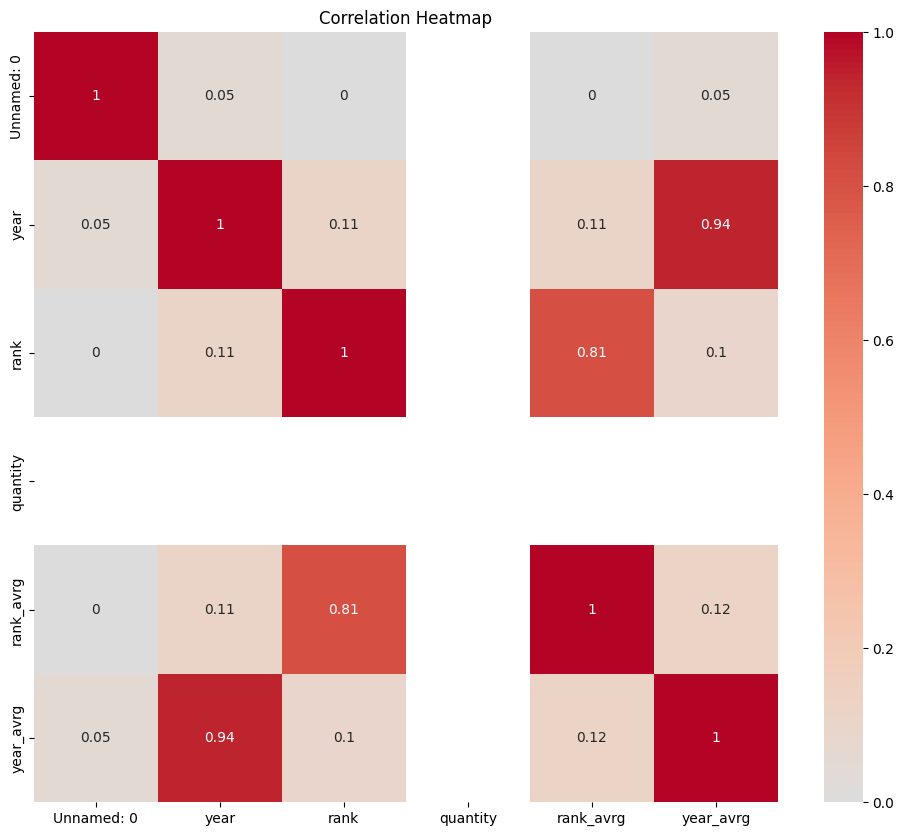


            Unnamed: 0  year  rank  quantity  rank_avrg  year_avrg
Unnamed: 0        1.00  0.05  0.00       NaN       0.00       0.05
year              0.05  1.00  0.11       NaN       0.11       0.94
rank              0.00  0.11  1.00       NaN       0.81       0.10
quantity           NaN   NaN   NaN       NaN        NaN        NaN
rank_avrg         0.00  0.11  0.81       NaN       1.00       0.12
year_avrg         0.05  0.94  0.10       NaN       0.12       1.00


In [ ]:
# Calculate correlation matrix
correlation_matrix = dsv.create_correlation_heatmap(df_cleaned)
print(correlation_matrix)


###### **3. Linear Regression (Finding Axes)** on the number of movies per director and their average rating.

In [ ]:
# Perform linear regression for the axes "Number of films per director" and "Average rating"
regression_results = dsv.linear_regression(director_movie_data, name_x='movie_count', name_y='rank')


LinregressResult(slope=0.005763273862829995, intercept=1.400020585880625, rvalue=0.049070225190846875, pvalue=1.4481675058539558e-35, stderr=0.0004627364344689768, intercept_stderr=0.009714420935140881)
Slope: 0.005763273862829995
Intercept: 1.400020585880625
R-value (Correlation Coefficient): 0.049070225190846875
P-value: 1.4481675058539558e-35
Standard Error: 0.0004627364344689768
Y-intercept: 1.400020585880625
R-squared: 0.0024078870002804233



#### **Conclusions:**

1. **Scatter Plot with Line of Best Fit**:
- This plot helping visualize the relationship between the number of movies each director has made and their average rating. The line of best fit showing the general trend.

2. **Correlation Matrix**:
- The correlation matrix reveal how strongly the numerical parameters in the data set are related to each other, such as rating, year of release, number of films

3. **Linear Regression**:
- Linear regression give more accurate idea of ​​the relationship between the number of films made by a director and their average rating. The correlation coefficient and p-value help to assess the strength and significance of this relationship.

These results will allow for further analysis of the data set, deepening the understanding of the relationships between the parameters of the films.

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

- Enthusiastic up for challenge
- Passionate about software
- Analytical and Outside The Box Thinking
- Crisis Resolution
- Attention to Detail
- Excellent Code Review
- Flexibility
- Great Time Management

## What caused you the most difficulty?

Your answer:

Minor difficulties with the core adaptation (reading, analysis and visualization functionality) to the specifics and technical features of Google Colab